In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# #Case 1
# u1 = 0.1 * 10**-3
# u2 = 1 * 10**-3
# kr1_max = 1
# kr2_max = 1
# a = 1.2
# b = 3
# s1i = 10e-6
# s2r = 0.2
# s1 = np.linspace(s1i, (1-s2r), 10000)

# #Case 2
# u1 = 1 * 10**-3
# u2 = 0.1 * 10**-3
# kr1_max = 0.15
# kr2_max = 1
# a = 4
# b = 1.5
# s1i = 0.2
# s2r = 0.5
# s1 = np.linspace(s1i, (1-s2r), 20000)

#Case 3
u1 = 0.4 * 10**-3
u2 = 0.1 * 10**-3
kr1_max = 0.4
kr2_max = 0.8
a = 8
b = 3
s1i = 0.2
s2r = 0.15
s1 = np.linspace(s1i, (1-s2r), 10000)


In [3]:
#Defining the function for fractional flow
def fractional_flow(viscosity_phase1, viscosity_phase2, rel_perm1, rel_perm2):
    ''' 
    This function calculates the fractional flow of a two-phase flow.
    
    Parameters:
    viscosity_phase1: float
        Viscosity of phase 1
    viscosity_phase2: float
        Viscosity of phase 2
    rel_perm1: float
        Relative permeability of phase 1
    rel_perm2: float
        Relative permeability of phase 2
        
    Returns:
    float
        Fractional flow
    '''
    f1 = 1/(1 + ((viscosity_phase1/viscosity_phase2) * (rel_perm2/rel_perm1)))
    return f1

In [4]:
#Defining the function for the effective saturation (Se):

def effective_saturation(saturation1, saturation1_min, residual_saturation2):
    '''
    This function calculates the effective saturation of a two-phase flow.
    
    Parameters:
    saturation1: float
        Saturation of phase 1
    saturation1_min: float
        Minimum saturation of phase 1
    residual_saturation2: float
        Residual saturation of phase 2
        
    Returns:
    float
        Effective saturation
    '''
    Se = (saturation1 - saturation1_min)/(1 - residual_saturation2 - saturation1_min)
    return Se


In [5]:
#Defining the function for relative permeability for phase 1:
def rel_perm1(rel_perm1_max, effective_saturation, a):
    '''
    This function calculates the relative permeability of phase 1.
    
    Parameters:
    rel_perm1_max: float
        Maximum relative permeability of phase 1
    effective_saturation: float
        Effective saturation
    a: float
        Exponent
        
    Returns:
    float
        Relative permeability of phase 1
    '''
    kr1 = rel_perm1_max * (effective_saturation**a)
    return kr1

In [6]:
#Defining the function for relative permeability for phase 2:
def rel_perm2(rel_perm2_max, effective_saturation, b):
    '''
    This function calculates the relative permeability of phase 2.
    
    Parameters:
    rel_perm2_max: float
        Maximum relative permeability of phase 2
    effective_saturation: float
        Effective saturation
    b: float
        Exponent
        
    Returns:
    float
        Relative permeability of phase 2
    '''
    kr2 = rel_perm2_max * ((1 - effective_saturation)**b)
    return kr2

In [7]:
#Writing the fractional flow equation in terms of effective saturation:

def f(saturation_phase1):
    '''
    This function calculates the fractional flow of a two-phase flow in terms of effective saturation.
    
    Parameters:

    effective_saturation: float
        Effective saturation
        
    Returns:
    float
        Fractional flow
    '''
    
    denominator = 1-s2r-s1i
    f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))
    return f1


In [8]:
#Analytical derivative function differentiation function

def central_difference_derivative(f, x):
    """
    Computes the numerical derivative of function f at the point specified by 'args' with respect
    to the parameter at position 'index' using the central difference method.
    
    Parameters:
    -----------
    f : function
        The function to differentiate. It should accept the parameters in the same order as in 'args'.
    x : float
        The variable the function depends on.
    h : float, optional
        The small perturbation value used for the finite difference approximation (default is 1e-6).
        
    Returns:
    --------
    float
        The approximated derivative.
    """
        
    h = 10e-6
    return (f(x+h) - f(x-h)) / (2 * h)

## Analytical Solution for F(s1)


/tmp/ipykernel_138864/2136481278.py:18: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))


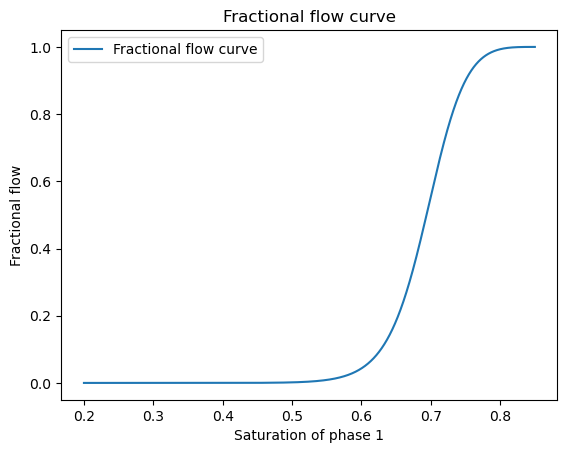

In [9]:
#Fractional flow curve
plt.plot(s1, f(s1), label='Fractional flow curve')
plt.xlabel('Saturation of phase 1')
plt.ylabel('Fractional flow')
plt.title('Fractional flow curve')
plt.legend()
plt.show()

In [10]:
Se = effective_saturation(s1, s1i, s2r)
kr1 = rel_perm1(kr1_max, Se, a)
kr2 = rel_perm2(kr2_max, Se, b)
f1 = f(s1)


/tmp/ipykernel_138864/2136481278.py:18: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))


In [11]:
#Derivatives of fractional flow wrt saturation

f1_prime = central_difference_derivative(f, s1)

#Shock tangent line
shock_tangent =  f1/(s1-s1i)


/tmp/ipykernel_138864/2270385285.py:6: RuntimeWarning: invalid value encountered in divide
  shock_tangent =  f1/(s1-s1i)


In [12]:
#Finding the shock velocity
idx = np.argwhere(np.diff(np.sign(f1_prime - shock_tangent))).flatten()
print(idx)
idx = idx[1]

[   0 8839]


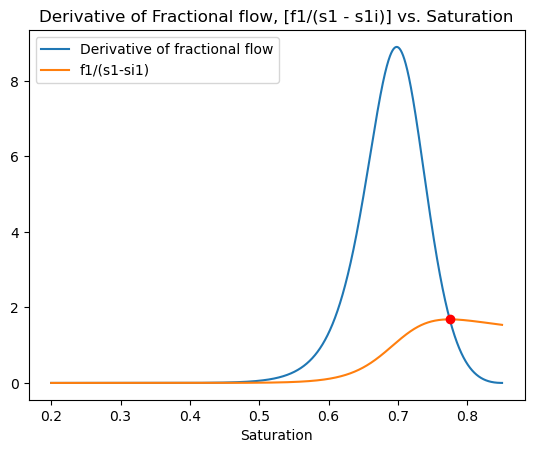

In [13]:
plt.plot(s1, f1_prime, label='Derivative of fractional flow')
plt.plot(s1, shock_tangent, label='f1/(s1-si1)')
plt.plot(s1[idx], shock_tangent[idx], 'ro')
plt.legend()
plt.title('Derivative of Fractional flow, [f1/(s1 - s1i)] vs. Saturation')
plt.xlabel('Saturation')
plt.show()


In [14]:
shock_velocity = shock_tangent[idx]
shock_saturation = s1[idx]

print('The shock velocity is:', shock_velocity)
print('The shock saturation is:', shock_saturation)


The shock velocity is: 1.683954469856649
The shock saturation is: 0.7745924592459246


In [15]:
#Variables for plotting the saturation and dimensionless velocity curve
s1_max = 1-s2r
print(s1_max)
vd_min = central_difference_derivative(f, s1_max)
print(vd_min)


0.85
2.9087843245179097e-09


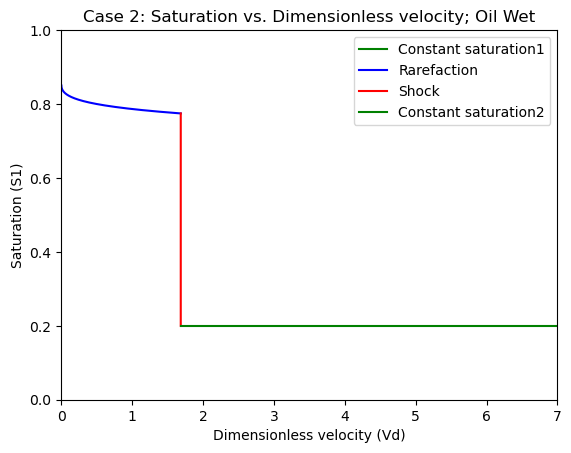

In [16]:
s1_rarefaction = s1[(s1>=shock_saturation) & (s1<=s1_max)]
vd_rarefaction = central_difference_derivative(f, s1_rarefaction)
vd_constant1 = np.linspace(0, vd_rarefaction[-1], 100)
s1_constant1 = np.ones_like(vd_constant1) * s1_max
plt.plot(vd_constant1, s1_constant1, 'g', label='Constant saturation1')
s1_shock = s1[(s1<=shock_saturation) & (s1>=s1i)]
vd_shock = np.ones_like(s1_shock)*vd_rarefaction[0]
plt.plot(vd_rarefaction, s1_rarefaction, 'b', label='Rarefaction')
plt.plot(vd_shock, s1_shock, 'r', label='Shock')
vd_constant2 = np.linspace(vd_shock[-1], 7, 100)
s1_constant2 = np.ones_like(vd_constant2) * s1_shock[0]
plt.plot(vd_constant2, s1_constant2, 'g', label='Constant saturation2')
plt.legend()
# plt.title('Case 1: Saturation vs. Dimensionless velocity; Water Wet')
plt.title('Case 2: Saturation vs. Dimensionless velocity; Oil Wet')
# plt.title('Case 3: Saturation vs. Dimensionless velocity; Mixed Wet')
plt.xlabel('Dimensionless velocity (Vd)')
plt.ylabel('Saturation (S1)')
plt.gca().set_xlim(0, 7)
plt.gca().set_ylim(0, 1)
plt.show()


In [17]:
# Concatenate all the vd values
vd_combined = np.concatenate((vd_constant1, vd_rarefaction, vd_shock))

# Concatenate the corresponding s1 values
s1_combined = np.concatenate((s1_constant1, s1_rarefaction, s1_shock))

# Calculate the area under the curve using the trapezoidal rule
area = np.trapz(s1_combined, vd_combined)
print("The area under the curve is:", area)

The area under the curve is: 0.9153746604781371


## Numerical Solution

/tmp/ipykernel_138864/2136481278.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))


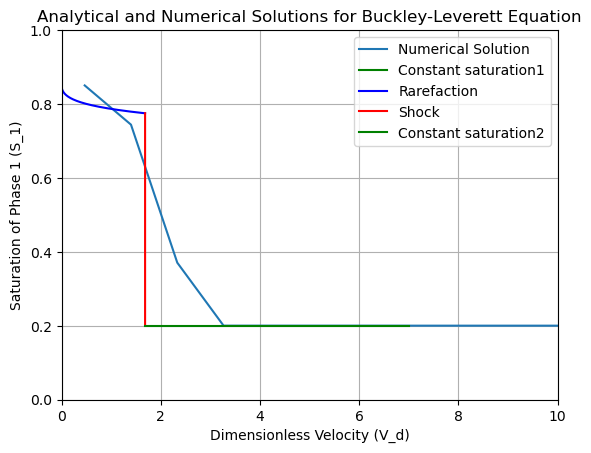

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 75           # Number of grid points (increase for better resolution)
dx = 0.007         # Space step
dt = 0.0001        # Time step


# Initialize saturation array
s1 = np.full(n, s1i)   # Set all to initial saturation
s1[0] = 1 - s2r        # Inlet boundary condition (fully saturated with water)

# Initialize fractional flow array
f_flow = np.array([f(s) for s in s1])
f_flow[0] = 1.0        # Inlet boundary condition (fully saturated with water)

# Time stepping loop
time_steps = 100  # You can adjust based on desired convergence
for step in range(time_steps):
    s1_new = s1.copy()  # Temporary array for saturation update
    
    for i in range(1, n):
        # Update saturation using the flux difference
        s1_new[i] = s1[i] + (dt*0.5 / dx) * (f_flow[i-1] - f_flow[i])

    # Update saturation and fractional flow
    s1 = s1_new.copy()
    f_flow = np.array([f(s) for s in s1])

# Compute dimensionless velocity using your formula
vd = np.array([(i - 0.5) * dx / (n * dt) for i in range(1, n+1)])

# Plot results
plt.plot(vd, s1, label="Numerical Solution")
plt.plot(vd_constant1, s1_constant1, 'g', label='Constant saturation1')
plt.plot(vd_rarefaction, s1_rarefaction, 'b', label='Rarefaction')
plt.plot(vd_shock, s1_shock, 'r', label='Shock')
plt.plot(vd_constant2, s1_constant2, 'g', label='Constant saturation2')
plt.xlabel("Dimensionless Velocity (V_d)")
plt.ylabel("Saturation of Phase 1 (S_1)")
# plt.title("Numerical Solution for Buckley-Leverett Solution for Case 1")
plt.title("Analytical and Numerical Solutions for Buckley-Leverett Equation")
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.legend()
plt.show()


# Chat GPT

/tmp/ipykernel_138864/1101313664.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))


Area under the saturation curve: 0.3333


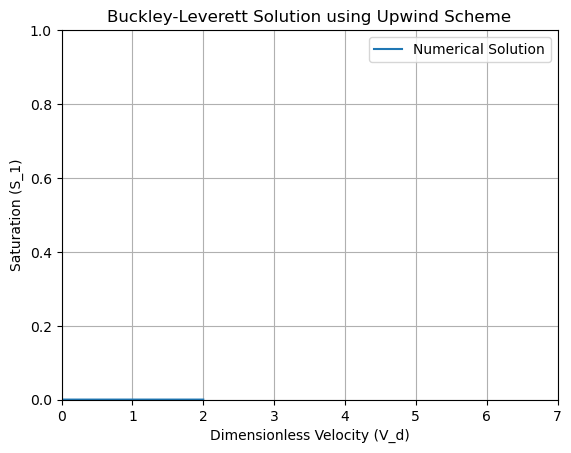

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Constants for Case 1 (CO2 injection into an aquifer)
mu1 = 0.1  # Viscosity of Phase 1 (CO2) in mPa.s
mu2 = 1.0  # Viscosity of Phase 2 (Water) in mPa.s
kr1_max = 1.0  # Maximum relative permeability of Phase 1
kr2_max = 1.0  # Maximum relative permeability of Phase 2
a = 1.2  # Corey exponent for Phase 1
b = 3.0  # Corey exponent for Phase 2
s1i = 0.0  # Initial saturation of Phase 1
s2r = 0.2  # Residual saturation of Phase 2
L = 1.0  # Domain length
n = 1000  # Number of grid points
dx = L / n
dt = 0.001  # Time step
T = 0.5  # Total simulation time

# Define fractional flow function
def f(S):
    return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))

# Initialize saturation array
s1 = np.full(n, s1i)
s1[0] = 1.0  # Inlet boundary condition
vd = np.linspace(0, L, n) / T  # Dimensionless velocity Vd = xD/tD

# Numerical solution using Upwind Scheme
for step in range(int(T / dt)):
    s1_new = s1.copy()
    for i in range(1, n):
        flux = f(s1[i-1])  # Single-point upstream weighting
        s1_new[i] = s1[i] - (dt / dx) * (flux - f(s1[i-1]))
    s1 = s1_new.copy()

# Compute area under curve~
area_under_curve = simpson(s1)
print(f"Area under the saturation curve: {area_under_curve:.4f}")

# Plot results
plt.plot(vd, s1, label="Numerical Solution")
plt.xlabel("Dimensionless Velocity (V_d)")
plt.ylabel("Saturation (S_1)")
plt.title("Buckley-Leverett Solution using Upwind Scheme")
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.legend()
plt.show()


/tmp/ipykernel_138864/1578640001.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))


Area under the saturation curve: 0.3333
Area under the analytical solution curve: 249.7501


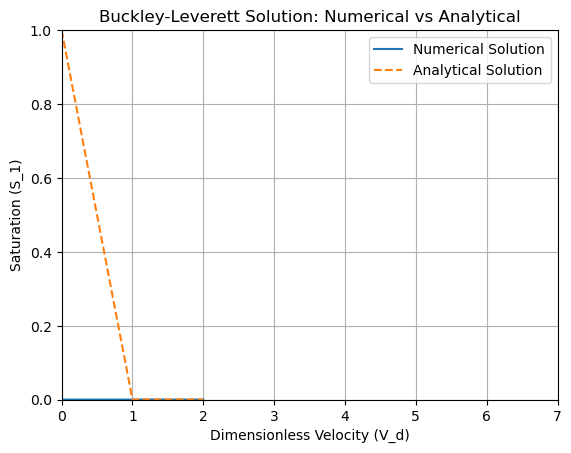

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Constants for Case 1 (CO2 injection into an aquifer)
mu1 = 0.1  # Viscosity of Phase 1 (CO2) in mPa.s
mu2 = 1.0  # Viscosity of Phase 2 (Water) in mPa.s
kr1_max = 1.0  # Maximum relative permeability of Phase 1
kr2_max = 1.0  # Maximum relative permeability of Phase 2
a = 1.2  # Corey exponent for Phase 1
b = 3.0  # Corey exponent for Phase 2
s1i = 0.0  # Initial saturation of Phase 1
s2r = 0.2  # Residual saturation of Phase 2
L = 1.0  # Domain length
n = 1000  # Number of grid points
dx = L / n
dt = 0.001  # Time step
T = 0.5  # Total simulation time

# Define fractional flow function
def f(S):
    return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))

# Initialize saturation array
s1 = np.full(n, s1i)
s1[0] = 1.0  # Inlet boundary condition
vd = np.linspace(0, L, n) / T  # Dimensionless velocity Vd = xD/tD

# Numerical solution using Upwind Scheme
for step in range(int(T / dt)):
    s1_new = s1.copy()
    for i in range(1, n):
        flux = f(s1[i-1])  # Single-point upstream weighting
        s1_new[i] = s1[i] - (dt / dx) * (flux - f(s1[i-1]))
    s1 = s1_new.copy()

# Compute area under curve
area_under_curve = simpson(s1)
print(f"Area under the saturation curve: {area_under_curve:.4f}")

# Analytical solution for comparison
def analytical_solution(vd):
    return np.piecewise(vd, [vd < 1, vd >= 1], [lambda v: 1 - (1 - s1i) * v, s1i])

s1_analytical = analytical_solution(vd)

# Compute area under analytical curve
area_analytical = simpson(s1_analytical)
print(f"Area under the analytical solution curve: {area_analytical:.4f}")

# Plot results
plt.plot(vd, s1, label="Numerical Solution")
plt.plot(vd, s1_analytical, linestyle='dashed', label="Analytical Solution")
plt.xlabel("Dimensionless Velocity (V_d)")
plt.ylabel("Saturation (S_1)")
plt.title("Buckley-Leverett Solution: Numerical vs Analytical")
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.legend()
plt.show()


/tmp/ipykernel_138864/405902094.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))
/tmp/ipykernel_138864/405902094.py:31: RuntimeWarning: invalid value encountered in scalar power
  return Pc0 * ((S - s2r) / (S_star - s2r))**c


Area under advective saturation curve: 0.3333
Area under spontaneous imbibition curve: nan
Area under the analytical solution curve: 249.7501


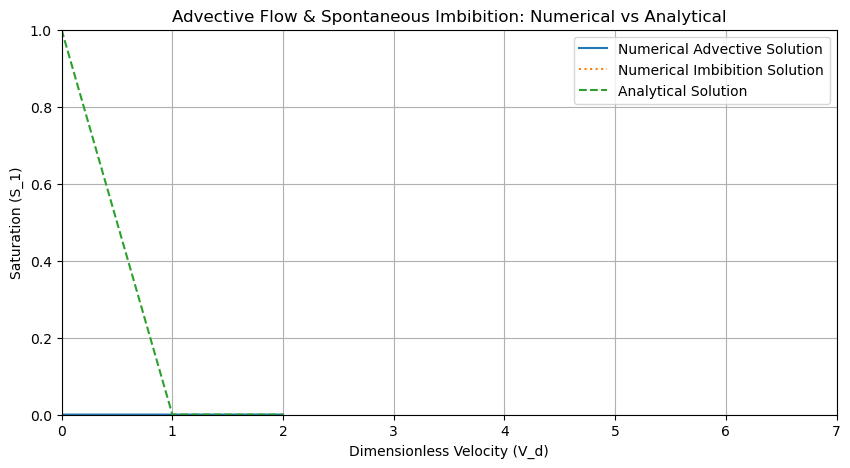

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Constants for Case 1 (CO2 injection into an aquifer)
mu1 = 0.1  # Viscosity of Phase 1 (CO2) in mPa.s
mu2 = 1.0  # Viscosity of Phase 2 (Water) in mPa.s
kr1_max = 1.0  # Maximum relative permeability of Phase 1
kr2_max = 1.0  # Maximum relative permeability of Phase 2
a = 1.2  # Corey exponent for Phase 1
b = 3.0  # Corey exponent for Phase 2
s1i = 0.0  # Initial saturation of Phase 1
s2r = 0.2  # Residual saturation of Phase 2
phi = 0.25  # Porosity for spontaneous imbibition
K = 1e-13  # Permeability in m^2
Pc0 = 100000  # Capillary pressure scaling factor
c = 0.3  # Capillary exponent
S_star = 0.5  # Residual saturation for capillary pressure
L = 1.0  # Domain length
n = 1000  # Number of grid points
dx = L / n
dt = 0.001  # Time step
T = 0.5  # Total simulation time

# Define fractional flow function
def f(S):
    return 1 / (1 + (mu1/mu2) * ((kr2_max * (1 - S)**b) / (kr1_max * S**a)))

# Define capillary pressure function
def Pc(S):
    return Pc0 * ((S - s2r) / (S_star - s2r))**c

# Initialize saturation array
s1 = np.full(n, s1i)
s1[0] = 1.0  # Inlet boundary condition
vd = np.linspace(0, L, n) / T  # Dimensionless velocity Vd = xD/tD

# Numerical solution using Upwind Scheme for Advective Flow
for step in range(int(T / dt)):
    s1_new = s1.copy()
    for i in range(1, n):
        flux = f(s1[i-1])  # Single-point upstream weighting
        s1_new[i] = s1[i] - (dt / dx) * (flux - f(s1[i-1]))
    s1 = s1_new.copy()

# Numerical solution for Spontaneous Imbibition using Explicit Finite Difference
S_imb = np.full(n, s1i)
for step in range(int(T / dt)):
    S_imb_new = S_imb.copy()
    for i in range(1, n-1):
        D = -(K/mu1) * ((kr2_max * (1 - S_imb[i])) / (kr1_max * S_imb[i] + kr2_max * (1 - S_imb[i]))) * (Pc(S_imb[i+1]) - Pc(S_imb[i])) / dx
        S_imb_new[i] = S_imb[i] + (dt / (phi * dx**2)) * (D * (S_imb[i+1] - 2*S_imb[i] + S_imb[i-1]))
    S_imb = S_imb_new.copy()

# Compute area under curves
area_under_advective = simpson(s1)
area_under_imbibition = simpson(S_imb)
print(f"Area under advective saturation curve: {area_under_advective:.4f}")
print(f"Area under spontaneous imbibition curve: {area_under_imbibition:.4f}")

# Analytical solution for comparison
def analytical_solution(vd):
    return np.piecewise(vd, [vd < 1, vd >= 1], [lambda v: 1 - (1 - s1i) * v, s1i])

s1_analytical = analytical_solution(vd)

# Compute area under analytical curve
area_analytical = simpson(s1_analytical)
print(f"Area under the analytical solution curve: {area_analytical:.4f}")

# Plot results
plt.figure(figsize=(10,5))
plt.plot(vd, s1, label="Numerical Advective Solution")
plt.plot(vd, S_imb, label="Numerical Imbibition Solution", linestyle='dotted')
plt.plot(vd, s1_analytical, linestyle='dashed', label="Analytical Solution")
plt.xlabel("Dimensionless Velocity (V_d)")
plt.ylabel("Saturation (S_1)")
plt.title("Advective Flow & Spontaneous Imbibition: Numerical vs Analytical")
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.legend()
plt.show()
